<a href="https://colab.research.google.com/github/newb-dev-1008/CoVID_Entertainment_Impact/blob/master/Entertainment_during_CoVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project to find the correlation between latitudes and the spread of CoVID-19**

**Objectives/ guidelines to keep in mind:**

*   Segregate all data region-wise
*   Replace the regions column with the corresponding latitudes from the latitudes dataset
*   Visually determine the rates of growth in cases in the most-hit and the least-hit regions
*   Predict the growth of cases and check if latitudes and growth are correlated; whether latitudes behave as a deciding factor in prediction

**IMPORTANT: Remember to add the CSV files everytime you log in to the notebook. The CSV files are kept in the GitHub repository; you can save them to your respective devices and upload them whenever you work.**

**Directions for saving:**

- Go to File - Save a copy on GitHub.
- Select the repository and the branch "ipython".
- **Do not change the name of the Colab notebook while saving.**

Also, try to create a text cell to note the variable names with their specifications wherever possible. It'll be helpful for all teammates.





In [0]:
import pandas as pd

latitudes = pd.read_csv('latitudes.csv')
covid_data = pd.read_csv('covid_19_data.csv')

In [0]:
latitudes_countries = latitudes.iloc[:, :4]
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
covid_data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


**Finding all countries listed in the Country/ Region column of CoVID Dataset:**

In [0]:
covid_data['Country/Region'].unique()   #Returns all unique labels contained in the column
covid_data['Country/Region'].nunique()   #Returns number of unique labels contained in the column

185

**Similarly, finding all countries listed under the 'Country' column of the latitudes dataset**

In [0]:
latitudes_countries['country'].unique()
latitudes_countries['country'].nunique()

245

# **We Observe:**
- China is called "Mainland China" in the CoVID-19 Dataset
- The number of countries in the latitude dataset is more; the countries present in both datasets need to be replaced with their corresponding latitudes

Hence, we need to:
- Check for extra countries in either dataset
- Merge those countries with bigger countries manually (ex: if one dataset calls it US while the other calls it United States, both need to be merged into one label and so on)
- Discard redundant countries/ countries with zero cases

In [0]:
latitudes_countries['country'].unique()

array(['Andorra', 'United Arab Emirates', 'Afghanistan',
       'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia',
       'Netherlands Antilles', 'Angola', 'Antarctica', 'Argentina',
       'American Samoa', 'Austria', 'Australia', 'Aruba', 'Azerbaijan',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin',
       'Bermuda', 'Brunei', 'Bolivia', 'Brazil', 'Bahamas', 'Bhutan',
       'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Cocos [Keeling] Islands', 'Congo [DRC]',
       'Central African Republic', 'Congo [Republic]', 'Switzerland',
       "Côte d'Ivoire", 'Cook Islands', 'Chile', 'Cameroon', 'China',
       'Colombia', 'Costa Rica', 'Cuba', 'Cape Verde', 'Christmas Island',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia',
       'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethi

In [0]:
covid_data['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea-Bissau',

In [0]:
#Define a function to seperate extra countries in both datasets
import numpy as np

def extra_countries(c1, c2):
  extra_countries = []
  for i in c1:
    flag = 0
    for j in c2:
      if (i == j):
        flag = 1
    if (flag == 0):
      extra_countries.append(i)
  
  return np.array(extra_countries)

In [0]:
#Finding countries that are in latitudes.csv but not in covid_19_data.csv

extra_countries(latitudes_countries['country'].unique(), covid_data['Country/Region'].unique())

array(['Anguilla', 'Netherlands Antilles', 'Antarctica', 'American Samoa',
       'Aruba', 'Bermuda', 'Bouvet Island', 'Cocos [Keeling] Islands',
       'Congo [DRC]', 'Congo [Republic]', "Côte d'Ivoire", 'Cook Islands',
       'Cape Verde', 'Christmas Island', 'Czech Republic',
       'Falkland Islands [Islas Malvinas]', 'Micronesia', 'Faroe Islands',
       'French Guiana', 'Guernsey', 'Gibraltar', 'Greenland',
       'Guadeloupe', 'South Georgia and the South Sandwich Islands',
       'Guam', 'Gaza Strip', 'Hong Kong',
       'Heard Island and McDonald Islands', 'Isle of Man',
       'British Indian Ocean Territory', 'Jersey', 'Kiribati', 'Comoros',
       'North Korea', 'South Korea', 'Cayman Islands', 'Lesotho',
       'Marshall Islands', 'Macedonia [FYROM]', 'Myanmar [Burma]',
       'Macau', 'Northern Mariana Islands', 'Martinique', 'Montserrat',
       'New Caledonia', 'Norfolk Island', 'Nauru', 'Niue',
       'French Polynesia', 'Saint Pierre and Miquelon',
       'Pitcairn Is

In [0]:
#Finding countries that are in covid_19_data.csv but not in latitudes.csv

extra_countries(covid_data['Country/Region'].unique(),latitudes_countries['country'].unique())

array(['Burma', 'Cabo Verde', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Czechia', 'Diamond Princess', 'Eswatini',
       'Holy See', 'Korea, South', 'MS Zaandam', 'North Macedonia',
       'Sao Tome and Principe', 'South Sudan', 'Taiwan*', 'US',
       'West Bank and Gaza'], dtype='<U21')

**Replace country names in CoVID-19 dataset with matching names from Latitudes dataset**

In [0]:
corrected_covid_data = covid_data.replace(['Burma','Congo (Brazzaville)', 'Congo (Kinshasa)',
       "Cote d'Ivoire", 'Czechia', 'Diamond Princess',
       'Korea, South', 'North Macedonia',
       'South Sudan', 'Taiwan*', 'US',
       'West Bank and Gaza'], ['Myanmar [Burma]', 'Congo [DRC]', 'Congo [DRC]', "Côte d'Ivoire", 'Czech Republic',
                               'Japan', 'South Korea',
                               'Macedonia [FYROM]', 'Sudan', 'Taiwan', 'United States', 'Gaza Strip'])
countries_to_drop = ['Holy See','Eswatini', 'Cabo Verde','MS Zaandam',
                     'Sao Tome and Principe']

In [0]:
corrected_covid_data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [0]:
#Finding countries in corrected_covid_data but not in latitudes

extras = extra_countries(corrected_covid_data['Country/Region'].unique(), latitudes_countries['country'].unique())
print(extras)

['Cabo Verde' 'Eswatini' 'Holy See' 'MS Zaandam' 'Sao Tome and Principe']


In [0]:
for i in extras:
  corrected_covid_data = corrected_covid_data[corrected_covid_data['Country/Region'] != i]

## **Enter code to replace the Country/ Region column with the latitude and longitude columns**
Also, drop unnecessary columns

In [0]:
latitudes_countries.head()

,country_code,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [0]:
req_lat_long = latitudes_countries.loc[:,['country','latitude', 'longitude']]
req_lat_long = req_lat_long.set_index('country')

In [0]:
req_lat_long.head()

,latitude,longitude
country,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615


In [0]:
latitude_cols = []
longitude_cols = []

for i in corrected_covid_data['Country/Region']:
  latitude = req_lat_long.loc[i, 'latitude']
  longitude = req_lat_long.loc[i, 'longitude']
  latitude_cols.append(latitude)
  longitude_cols.append(longitude)

latitude_cols = np.array(latitude_cols)
longitude_cols = np.array(longitude_cols)

In [0]:
corrected_covid_data['Latitude'] = latitude_cols
corrected_covid_data['Longitude'] = longitude_cols

In [0]:
corrected_covid_data = corrected_covid_data.drop(['Lat','Long'], axis = 1)
corrected_covid_data.head()       #Obtained latitude and longitude for all countries within the dataframe

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths,Latitude,Longitude
0,2020-01-22,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
1,2020-01-23,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
2,2020-01-24,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
3,2020-01-25,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953
4,2020-01-26,Afghanistan,NaN,0.0,0.0,0.0,33.93911,67.709953


In [0]:
corrected_covid_data = corrected_covid_data.drop(['Province/State'], axis = 1)
corrected_covid_data.head()

,Date,Country/Region,Confirmed,Recovered,Deaths,Latitude,Longitude
0,2020-01-22,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
1,2020-01-23,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
2,2020-01-24,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
3,2020-01-25,Afghanistan,0.0,0.0,0.0,33.93911,67.709953
4,2020-01-26,Afghanistan,0.0,0.0,0.0,33.93911,67.709953


In [0]:
#Obtain a list of all affected countries
def most_affected(X):
  country_cases = {}
  countries = X.index.unique()
  for i in countries:
    cases =  np.sum(X.loc[[i],['Confirmed']])
    country_cases[i] = cases

  country_cases_df = pd.DataFrame(country_cases)
  country_cases_df = country_cases_df.transpose()
  affected_countries = []
  for i in range(8):
    country = country_cases_df[['Confirmed']].idxmax()['Confirmed']
    affected_countries.append(country)
    country_cases_df = country_cases_df.drop([country], axis = 0)

  return affected_countries

In [0]:
corrected_covid_data['Date'] =  pd.to_datetime(corrected_covid_data['Date'],
                              format='%Y-%m-%d')

In [0]:
temperature = pd.read_csv('temperature_dataframe.csv')
temperature.head()

,Unnamed: 0,id,province,country,lat,long,date,cases,fatalities,capital,humidity,sunHour,tempC,windspeedKmph
0,0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,Kabul,65.0,8.7,-1.0,8.0
1,1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,Kabul,59.0,8.7,-3.0,8.0
2,2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,Kabul,71.0,7.1,0.0,7.0
3,3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,Kabul,79.0,8.7,0.0,7.0
4,4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,Kabul,64.0,8.7,-1.0,8.0


In [0]:
humidity = (temperature['humidity'].groupby(temperature['country']))
temp = temperature['tempC'].groupby(temperature['country'])

In [0]:
temp.head()

0        -1.0
1        -3.0
2         0.0
3         0.0
4        -1.0
         ... 
16617    25.0
16618    27.0
16619    27.0
16620    26.0
16621    28.0
Name: tempC, Length: 780, dtype: float64

In [0]:
extra_countries(corrected_covid_data['Country/Region'].unique(), temperature['country'].unique())

array(['Angola', 'Antigua and Barbuda', 'Belize', 'Botswana',
       'Myanmar [Burma]', 'Burundi', 'Chad', 'Congo [DRC]', 'Costa Rica',
       "Côte d'Ivoire", 'Dominica', 'El Salvador', 'Eritrea', 'Fiji',
       'Grenada', 'Guinea-Bissau', 'Haiti', 'South Korea', 'Laos',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Nicaragua',
       'Niger', 'Macedonia [FYROM]', 'Papua New Guinea',
       'Saint Kitts and Nevis', 'San Marino', 'Sierra Leone', 'Syria',
       'Timor-Leste', 'United States', 'Uganda', 'United Arab Emirates',
       'United Kingdom', 'Gaza Strip', 'Western Sahara', 'Yemen',
       'Zimbabwe'], dtype='<U21')

In [0]:
# In temperature but not in covid_data
extra_countries(temperature['country'].unique(), corrected_covid_data['Country/Region'].unique())

array(['Barbuda', 'Aruba', "Cote d'Ivoire", 'Eswatini', 'French Guiana',
       'Greenland', 'Guadeloupe', 'Guam', 'Guernsey', 'Jersey', 'Korea',
       'Martinique', 'Mayotte', 'Macedonia', 'Puerto Rico', 'Congo',
       'Reunion', 'USA', 'UAE', 'UK'], dtype='<U13')

In [0]:
temp_corrected_data = temperature.replace(['Barbuda', 'Aruba', "Cote d'Ivoire", 'French Guiana',
       'Greenland', 'Guadeloupe', 'Korea',
       'Macedonia', 'Congo', 'USA', 'UAE', 'UK'], ['Antigua and Barbuda', 'Netherlands', "Côte d'Ivoire", 'France',
                                        'Denmark', 'France', 'South Korea', 'North Macedonia', 'Congo (Kinshasa)', 'United States',
                                        'United Arab Emirates', 'United Kingdom'])
countries_to_drop = ['Eswatini', 'Guam', 'Guernsey', 'Jersey', 'Martinique', 'Mayotte', 'Puerto Rico', 'Reunion']

In [0]:
#import statistics
avg_stuff = pd.DataFrame()
avg_stuff['Avg_temp'] = (temp_corrected_data['tempC'].groupby(temp_corrected_data['country'])).mean()
avg_stuff['Avg_humidity'] = (temp_corrected_data['humidity'].groupby(temp_corrected_data['country'])).mean()

In [0]:
avg_stuff.head()

,Avg_temp,Avg_humidity
country,,
Afghanistan,6.216667,56.933333
Albania,13.950000,69.900000
Algeria,19.566667,61.716667
Andorra,7.383333,75.233333
Antigua and Barbuda,25.716667,75.150000


In [0]:
temp = []
humidity = []

for i in corrected_covid_data['Country/Region']:
  try:
    temperature = avg_stuff.loc[i, 'Avg_temp']
    humid = avg_stuff.loc[i, 'Avg_humidity']
    temp.append(temperature)
    humidity.append(humid)
  except KeyError:
    temp.append(None)
    humidity.append(None)
temp = np.array(temp)
humidity = np.array(humidity)

In [0]:
corrected_covid_data['Average Temperature'] = temp
corrected_covid_data['Average Humidity'] = humidity

In [0]:
corrected_covid_data

,Date,Country/Region,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
0,2020-01-22,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
1,2020-01-23,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
2,2020-01-24,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
3,2020-01-25,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
4,2020-01-26,Afghanistan,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
...,...,...,...,...,...,...,...,...,...
23755,2020-04-16,Zimbabwe,23.0,1.0,3.0,-19.015438,29.154857,None,None
23756,2020-04-17,Zimbabwe,24.0,2.0,3.0,-19.015438,29.154857,None,None
23757,2020-04-18,Zimbabwe,25.0,2.0,3.0,-19.015438,29.154857,None,None
23758,2020-04-19,Zimbabwe,25.0,2.0,3.0,-19.015438,29.154857,None,None


In [0]:
corrected_covid_data.set_index(['Country/Region'])

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-23,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-24,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-25,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-26,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
...,...,...,...,...,...,...,...,...
Zimbabwe,2020-04-16,23.0,1.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-17,24.0,2.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-18,25.0,2.0,3.0,-19.015438,29.154857,None,None


In [0]:
corrected_covid_data.reset_index(drop = True, inplace = True)

In [0]:
corrected_covid_data.set_index('Country/Region', inplace = True)

In [0]:
df_most_affected = corrected_covid_data
affected = most_affected(df_most_affected)

In [0]:
print(affected)

['United States', 'China', 'Italy', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom']


**Plot for Cases/day vs Dates**

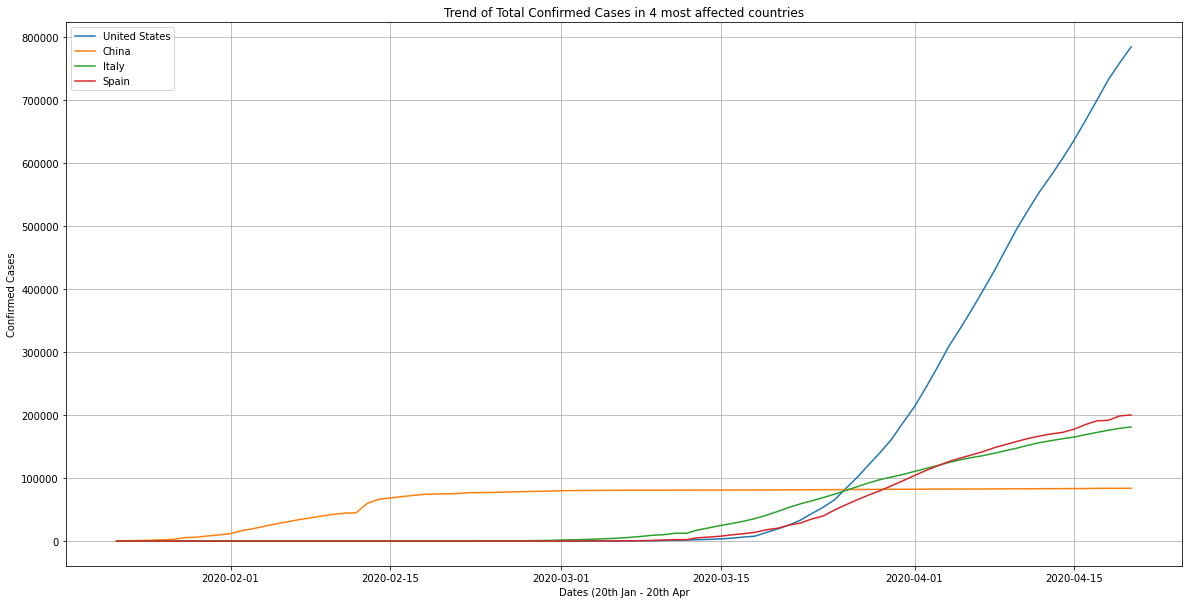

In [0]:
# Cases vs dates
import matplotlib.pyplot as plt
%matplotlib inline

cases_day = df_most_affected
plt.figure(figsize = [20,10])
for i in range(4):
  j = df_most_affected.loc[affected[i], ['Confirmed','Date']]
  j.reset_index(drop = True, inplace = True)
  j = j.groupby(["Date"]).sum()
  plt.plot(j.index, j['Confirmed'], label = str(affected[i]))

plt.xlabel('Dates (20th Jan - 20th Apr')
plt.ylabel('Confirmed Cases')
plt.title('Trend of Total Confirmed Cases in 4 most affected countries')
plt.legend()
plt.grid()

In [0]:
def cases_per_day(X):
  cases_day = []
  cases = 0
  for i in range(len(X.index) - 1):
    cases = X.iloc[(i + 1), 0] - X.iloc[i, 0]
    cases_day.append(cases)
  cases = X.iloc[(len(X.index) - 1), 0] - X.iloc[(len(X.index) - 2), 0]
  cases_day.append(cases)
  
  X['Cases per Day'] = np.array(cases_day)

  return X

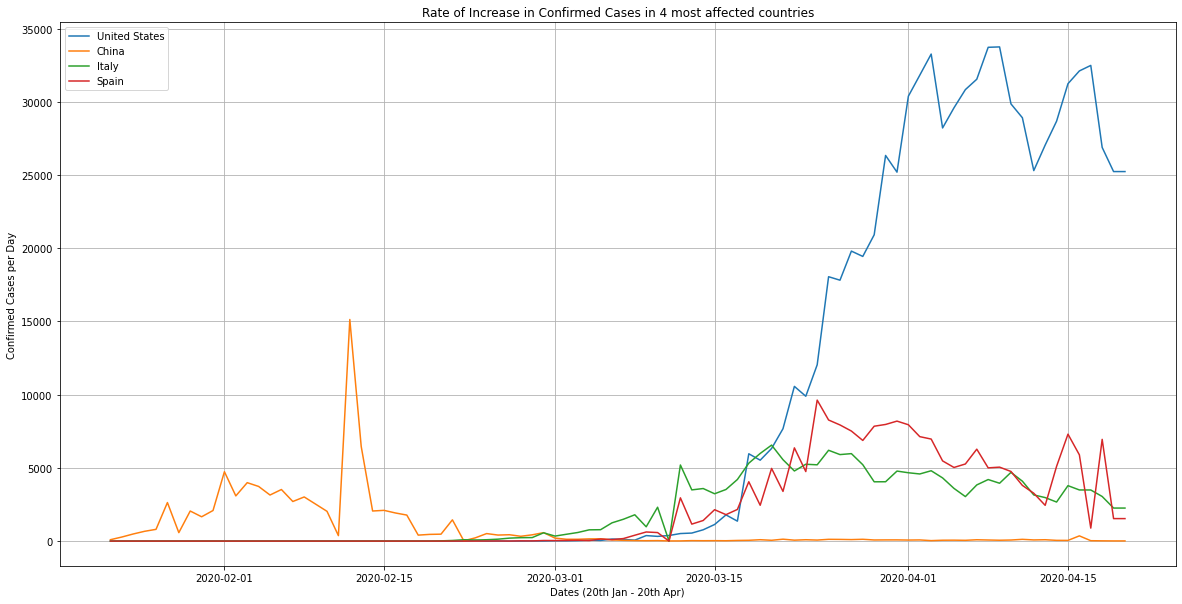

In [0]:
# Cases per Day vs Dates

%matplotlib inline
plt.figure(figsize = [20, 10])

for i in range(4):
  j = df_most_affected.loc[affected[i], ['Confirmed','Date']]
  j.reset_index(drop = True, inplace = True)
  j = j.groupby(["Date"]).sum()
  j = cases_per_day(j)
  plt.plot(j.index, j['Cases per Day'], label = affected[i])

plt.xlabel('Dates (20th Jan - 20th Apr)')
plt.ylabel('Confirmed Cases per Day')
plt.title('Rate of Increase in Confirmed Cases in 4 most affected countries')
plt.legend()
plt.grid()

**Plots for Latitude shift vs trends along latitude**

In [0]:
latitudes_df = corrected_covid_data

latitudes_df = latitudes_df.groupby(['Latitude'])['Confirmed'].sum()
latitudes_df = latitudes_df.to_frame()
latitudes_df

,Confirmed
Latitude,
-40.900557,27845.0
-38.416097,46373.0
-35.675147,150656.0
-32.522779,11763.0
-30.559482,53251.0
...,...
60.128161,239678.0
60.472024,176653.0
61.524010,357425.0


In [0]:
# Sorting all countries according to latitude

latitudes_df['Latitude'] = latitudes_df.index
latitudes_df = latitudes_df.reset_index(drop = True, inplace = False)
latitudes_df.sort_values(by = 'Latitude', ascending = 1)
latitudes_df.head()
#latitudes_df = latitudes_df.sort_values('Latitude', axis = 1, ascending = True)

,Confirmed,Latitude
0,27845.0,-40.900557
1,46373.0,-38.416097
2,150656.0,-35.675147
3,11763.0,-32.522779
4,53251.0,-30.559482


<BarContainer object of 177 artists>

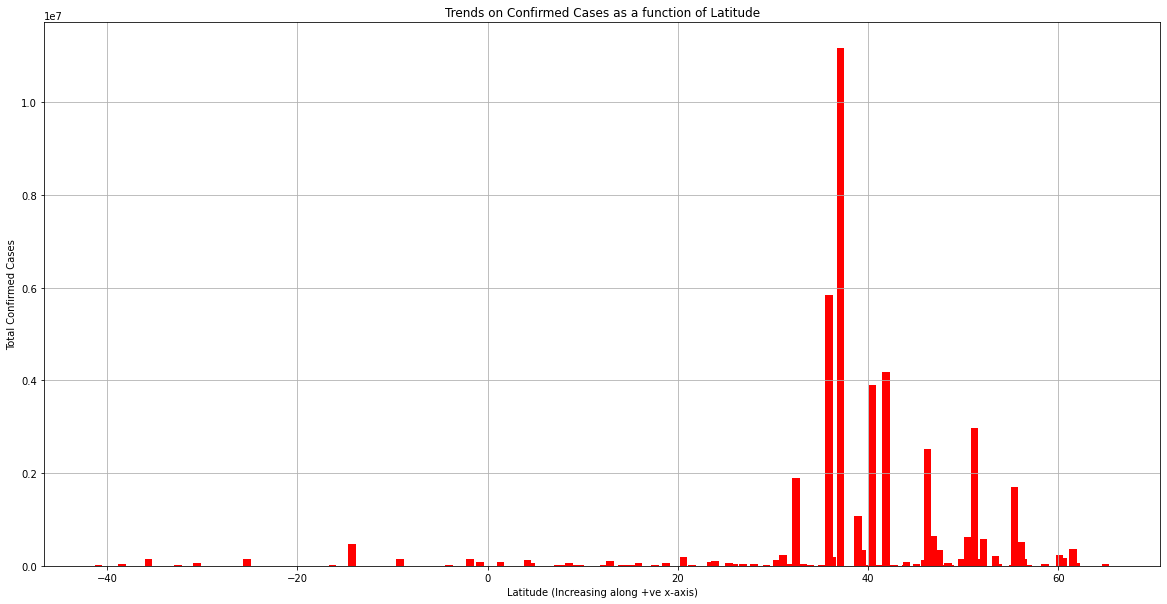

In [0]:
plt.figure(figsize = [20,10])
plt.title('Trends on Confirmed Cases as a function of Latitude')
plt.xlabel('Latitude (Increasing along +ve x-axis)')
plt.ylabel('Total Confirmed Cases')
plt.grid()
plt.bar(latitudes_df['Latitude'], latitudes_df['Confirmed'], color = 'red')

We observe that the plot is skewed towards the **45 degrees** mark. Countries between **30 degrees and 60 degrees** are the most affected ones. A more insightful chart would be incorporating the temperature and humidity factors in this plot.

In [0]:
'''longitudes_df = corrected_covid_data

longtudes_df = longitudes_df.groupby(['Longitude'])['Confirmed'].sum()
#longitudes_df = longitudes_df.to_frame()

longitudes_df['Longitude'] = longitudes_df.index
longitudes_df = longitudes_df.reset_index(drop = True, inplace = False)
longitudes_df = longitudes_df.sort_values(by = 'Longitude', ascending = 1)

plt.figure(figsize = [20,10])

plt.bar(longitudes_df['Longitude'], longitudes_df['Confirmed'])'''

"longitudes_df = corrected_covid_data\n\nlongtudes_df = longitudes_df.groupby(['Longitude'])['Confirmed'].sum()\n#longitudes_df = longitudes_df.to_frame()\n\nlongitudes_df['Longitude'] = longitudes_df.index\nlongitudes_df = longitudes_df.reset_index(drop = True, inplace = False)\nlongitudes_df = longitudes_df.sort_values(by = 'Longitude', ascending = 1)\n\nplt.figure(figsize = [20,10])\n\nplt.bar(longitudes_df['Longitude'], longitudes_df['Confirmed'])"

**Finding trends of temperature with varying latitude**

In [0]:
corrected_covid_data.head()

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-23,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-24,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-25,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-26,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333


In [0]:
corrected_covid_data.dtypes

Date                   datetime64[ns]
Confirmed                     float64
Recovered                     float64
Deaths                        float64
Latitude                      float64
Longitude                     float64
Average Temperature            object
Average Humidity               object
dtype: object

In [0]:
#Countries whose temperatures aren't known

nan_temp = corrected_covid_data[corrected_covid_data['Average Temperature'].isna()]
nan_temp

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Angola,2020-01-22,0.0,0.0,0.0,-11.202692,17.873887,None,None
Angola,2020-01-23,0.0,0.0,0.0,-11.202692,17.873887,None,None
Angola,2020-01-24,0.0,0.0,0.0,-11.202692,17.873887,None,None
Angola,2020-01-25,0.0,0.0,0.0,-11.202692,17.873887,None,None
Angola,2020-01-26,0.0,0.0,0.0,-11.202692,17.873887,None,None
...,...,...,...,...,...,...,...,...
Zimbabwe,2020-04-16,23.0,1.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-17,24.0,2.0,3.0,-19.015438,29.154857,None,None
Zimbabwe,2020-04-18,25.0,2.0,3.0,-19.015438,29.154857,None,None


In [0]:
nan_countries = nan_temp.index.unique()
nan_countries

Index(['Angola', 'Belize', 'Botswana', 'Myanmar [Burma]', 'Burundi', 'Chad',
       'Congo [DRC]', 'Costa Rica', 'Dominica', 'Dominican Republic',
       'El Salvador', 'Eritrea', 'Fiji', 'Grenada', 'Guinea-Bissau', 'Haiti',
       'Laos', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique',
       'Nicaragua', 'Niger', 'Macedonia [FYROM]', 'Papua New Guinea',
       'Saint Kitts and Nevis', 'San Marino', 'Sierra Leone', 'Syria',
       'Timor-Leste', 'Trinidad and Tobago', 'Uganda', 'Gaza Strip',
       'Western Sahara', 'Yemen', 'Zimbabwe'],
      dtype='object', name='Country/Region')

In [0]:
removed_nan = corrected_covid_data.dropna(axis = 0, how = 'any')
removed_nan

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-23,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-24,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-25,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
Afghanistan,2020-01-26,0.0,0.0,0.0,33.939110,67.709953,6.21667,56.9333
...,...,...,...,...,...,...,...,...
Zambia,2020-04-16,48.0,30.0,2.0,-13.133897,27.849332,24.9667,87.7667
Zambia,2020-04-17,52.0,30.0,2.0,-13.133897,27.849332,24.9667,87.7667
Zambia,2020-04-18,57.0,33.0,2.0,-13.133897,27.849332,24.9667,87.7667


In [0]:
removed_nan = removed_nan.reset_index()
removed_nan = removed_nan.drop(['Country/Region','Date','Confirmed','Recovered','Deaths','Average Humidity', 'Longitude'], axis = 1)
removed_nan

,Latitude,Average Temperature
0,33.939110,6.21667
1,33.939110,6.21667
2,33.939110,6.21667
3,33.939110,6.21667
4,33.939110,6.21667
...,...,...
18535,-13.133897,24.9667
18536,-13.133897,24.9667
18537,-13.133897,24.9667
18538,-13.133897,24.9667


In [0]:
lat = pd.to_numeric(removed_nan['Latitude'])
avg_temp = pd.to_numeric(removed_nan['Average Temperature'])

In [0]:
removed_nan['Latitude'] = lat
removed_nan['Average Temperature'] = avg_temp
removed_nan.set_index('Latitude')
removed_nan

,Latitude,Average Temperature
0,33.939110,6.216667
1,33.939110,6.216667
2,33.939110,6.216667
3,33.939110,6.216667
4,33.939110,6.216667
...,...,...
18535,-13.133897,24.966667
18536,-13.133897,24.966667
18537,-13.133897,24.966667
18538,-13.133897,24.966667


In [0]:
removed_nan = removed_nan.groupby(['Latitude']).mean()
removed_nan

,Average Temperature
Latitude,
-40.900557,18.700000
-38.416097,32.816667
-35.675147,25.866667
-32.522779,28.700000
-30.559482,29.816667
...,...
60.128161,4.650000
60.472024,2.383333
61.524010,2.016667


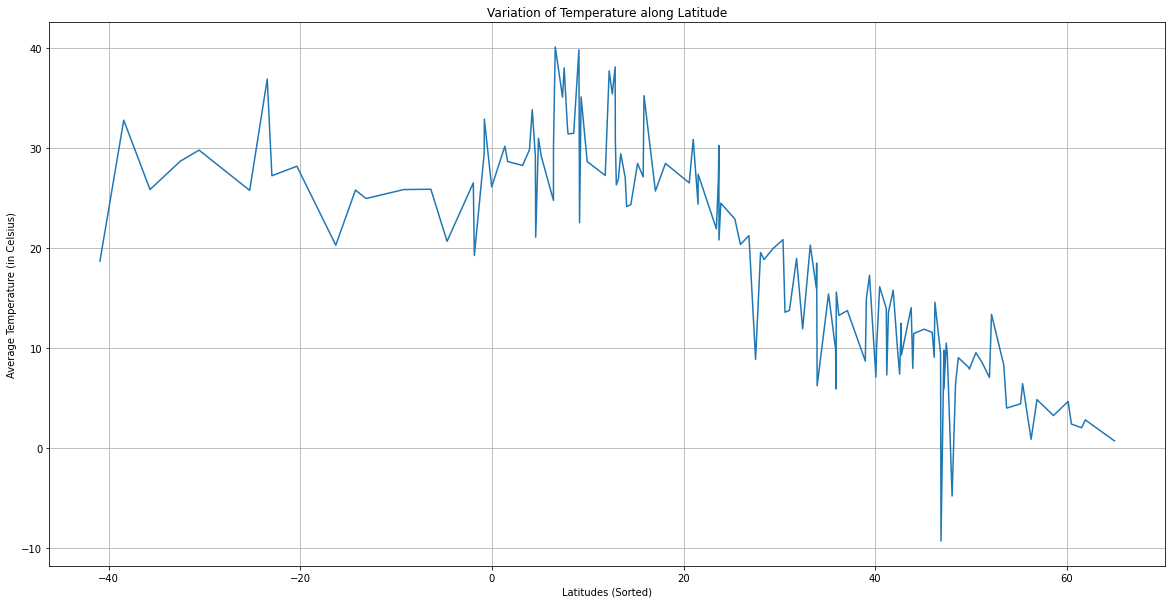

In [0]:
# Trends of latitude vs average temperature
plt.figure(figsize=[20,10])
plt.plot(removed_nan.index, removed_nan['Average Temperature'])
plt.xlabel('Latitudes (Sorted)')
plt.ylabel('Average Temperature (in Celsius)')
plt.title('Variation of Temperature along Latitude')
#plt.plot(latitudes_df['Latitude'], latitudes_df['Confirmed'], color = 'red')
plt.grid()

In [0]:
# Cases, Latitudes and Temperatures

corrected_covid_data.head()

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
Afghanistan,2020-01-22,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-23,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-24,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-25,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333
Afghanistan,2020-01-26,0.0,0.0,0.0,33.93911,67.709953,6.21667,56.9333


In [0]:
corrected_covid_data.dtypes

Date                   datetime64[ns]
Confirmed                     float64
Recovered                     float64
Deaths                        float64
Latitude                      float64
Longitude                     float64
Average Temperature            object
Average Humidity               object
dtype: object

In [0]:
corrected_covid_data = corrected_covid_data.astype({'Average Temperature':'float64', 'Average Humidity': 'float64'})

In [0]:
corrected_covid_data.dtypes

Date                   datetime64[ns]
Confirmed                     float64
Recovered                     float64
Deaths                        float64
Latitude                      float64
Longitude                     float64
Average Temperature           float64
Average Humidity              float64
dtype: object

In [0]:
confirmed = corrected_covid_data.drop(['Date','Recovered','Deaths','Longitude','Average Humidity'], axis = 1)
confirmed.head()

,Confirmed,Latitude,Average Temperature
Country/Region,,,
Afghanistan,0.0,33.93911,6.216667
Afghanistan,0.0,33.93911,6.216667
Afghanistan,0.0,33.93911,6.216667
Afghanistan,0.0,33.93911,6.216667
Afghanistan,0.0,33.93911,6.216667


In [0]:
confirmed = confirmed.reset_index()
confirmed.head()

,Country/Region,Confirmed,Latitude,Average Temperature
0,Afghanistan,0.0,33.93911,6.216667
1,Afghanistan,0.0,33.93911,6.216667
2,Afghanistan,0.0,33.93911,6.216667
3,Afghanistan,0.0,33.93911,6.216667
4,Afghanistan,0.0,33.93911,6.216667


In [0]:
confirmed_latitude = confirmed[['Confirmed', 'Latitude']]
confirmed_latitude.head()

,Confirmed,Latitude
0,0.0,33.93911
1,0.0,33.93911
2,0.0,33.93911
3,0.0,33.93911
4,0.0,33.93911


In [0]:
confirmed_latitude = confirmed_latitude.groupby('Latitude')['Confirmed'].sum()
confirmed_latitude.head()

Latitude
-40.900557     27845.0
-38.416097     46373.0
-35.675147    150656.0
-32.522779     11763.0
-30.559482     53251.0
Name: Confirmed, dtype: float64

In [0]:
confirmed_temp = confirmed[['Latitude', 'Average Temperature']]
confirmed_temp = confirmed_temp.groupby('Latitude')['Average Temperature'].mean()
confirmed_temp.head()

Latitude
-40.900557    18.700000
-38.416097    32.816667
-35.675147    25.866667
-32.522779    28.700000
-30.559482    29.816667
Name: Average Temperature, dtype: float64

In [0]:
confirmed_temp

Latitude
-40.900557    18.700000
-38.416097    32.816667
-35.675147    25.866667
-32.522779    28.700000
-30.559482    29.816667
                ...    
 60.128161     4.650000
 60.472024     2.383333
 61.524010     2.016667
 61.924110     2.800000
 64.963051     0.700000
Name: Average Temperature, Length: 177, dtype: float64

In [0]:
confirmed_temp = confirmed_temp.drop(-32.522779, axis = 0)
confirmed_latitude = confirmed_latitude.drop(-32.522779, axis = 0)

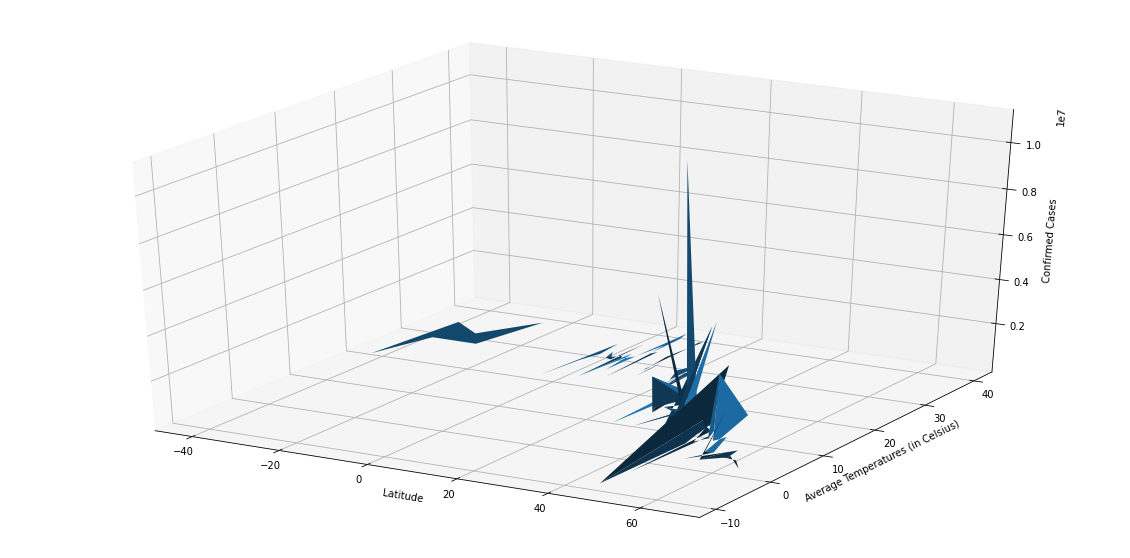

In [0]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
X = confirmed_latitude.index.to_numpy()
Y = confirmed_temp.to_numpy()
Z = confirmed_latitude.to_numpy()

x = np.reshape(X, (-1, 2))
y = np.reshape(Y, (-1, 2))
z = np.reshape(Z, (-1, 2))

ax.set_xlabel('Latitude')
ax.set_ylabel('Average Temperatures (in Celsius)')
ax.set_zlabel('Confirmed Cases')

ax.plot_surface(x, y, z)

plt.show()

In [0]:
# Plot confirmed_temp and confirmed_latitude

In [0]:
top_four = corrected_covid_data.loc[['United States','China','Italy','Spain'], :]
top_four

,Date,Confirmed,Recovered,Deaths,Latitude,Longitude,Average Temperature,Average Humidity
Country/Region,,,,,,,,
United States,2020-01-22,1.0,0.0,0.0,37.090240,-95.712891,13.750000,73.400000
United States,2020-01-23,1.0,0.0,0.0,37.090240,-95.712891,13.750000,73.400000
United States,2020-01-24,2.0,0.0,0.0,37.090240,-95.712891,13.750000,73.400000
United States,2020-01-25,2.0,0.0,0.0,37.090240,-95.712891,13.750000,73.400000
United States,2020-01-26,5.0,0.0,0.0,37.090240,-95.712891,13.750000,73.400000
...,...,...,...,...,...,...,...,...
Spain,2020-04-16,184948.0,74797.0,19315.0,40.463667,-3.749220,16.133333,65.666667
Spain,2020-04-17,190839.0,74797.0,20002.0,40.463667,-3.749220,16.133333,65.666667
Spain,2020-04-18,191726.0,74797.0,20043.0,40.463667,-3.749220,16.133333,65.666667


In [0]:
# 3D plot of cases, temperature and humidity

In [0]:
# Plot of recovery vs temperature